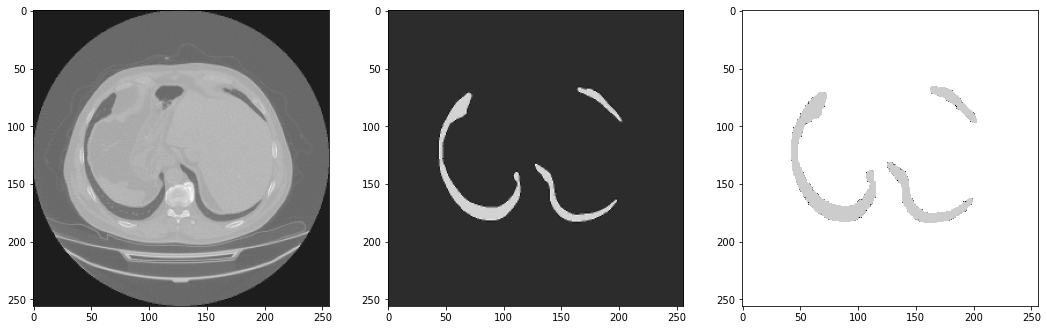

In [10]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

IMAGE_LIB = './ds_lungseg/images/'
LUNGMASK_LIB = './ds_lungseg/masks/'
VESSELMASK_LIB = './ds_lungseg/vesselmasks/'
IMG_HEIGHT, IMG_WIDTH = 256, 256

all_images = [x for x in sorted(os.listdir(IMAGE_LIB)) if x[-4:] == '.png']

src_data = np.empty((len(all_images), IMG_HEIGHT, IMG_WIDTH), dtype='float32')
lungmask_data = np.empty((len(all_images), IMG_HEIGHT, IMG_WIDTH), dtype='float32')
for i, name in enumerate(all_images):
    im = cv2.imread(IMAGE_LIB + name, cv2.IMREAD_UNCHANGED).astype("int16").astype('float32')
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    #diff = np.max(im) - np.min(im)
    #if (diff!=0):
    #    im = (im - np.min(im)) / diff
    src_data[i] = im

    im = cv2.imread(LUNGMASK_LIB + name, cv2.IMREAD_UNCHANGED).astype("int16").astype('float32')
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    #diff = np.max(im) - np.min(im)
    #if (diff!=0):
    #    im = (im - np.min(im)) / diff

    lungmask_data[i] = im

        
imgsrc = src_data[100]
lungmask = lungmask_data[100]

fig, ax = plt.subplots(1,3, figsize = (18,9))
ax[0].imshow(imgsrc, cmap='gray')
ax[1].imshow(lungmask, cmap='gray')

    
imginverted = cv2.bitwise_not(lungmask)

ax[2].imshow(imginverted, cmap='gray')


plt.show()

In [17]:
#input data: imgsrc, lungmask
#output data: imgres - vessel mask

def createVesselMask(imgsrc, lungmask):
   
    #do some normalization
    #for the image
    diff = np.max(imgsrc) - np.min(imgsrc)
    #print("diff: %s imgsrc - np.min(imgsrc) %s" % (diff,  imgsrc - np.min(imgsrc)/ diff))
    #print("diff: %s lungmask - np.min(lungmask) %s" % (diff,  imgsrc - np.min(lungmask)/ diff))
    if (diff!=0):
        imgsrc = (imgsrc - np.min(imgsrc)) / diff

    #and the mask
    lungmask=lungmask/255.
    
    imgres = imgsrc.copy()
    
    for x in range(0,IMG_WIDTH):# process all pixels
        for y in range(0,IMG_HEIGHT):
            imgres[x,y]=0
            #we process only in mask pixels
            if (lungmask[x, y] >= 0.5 ):
                if (imgsrc[x, y] >= 0.5):
                    imgres[x,y] = 1.0
                
    return imgres

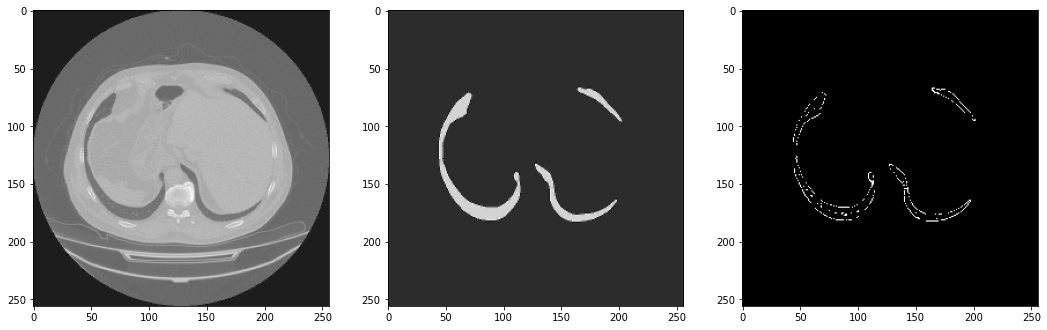

In [18]:


vesselmask = createVesselMask(imgsrc, lungmask)

diff = np.max(imgsrc) - np.min(imgsrc)
if (diff!=0):
    imgsrc = (imgsrc - np.min(imgsrc)) / diff

fig, ax = plt.subplots(1,3, figsize = (18,9))
ax[0].imshow(imgsrc, cmap='gray')
ax[1].imshow(lungmask, cmap='gray')
ax[2].imshow(vesselmask, cmap='gray')



plt.show()